In [1]:
# basic operations
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns
import io
# visualizations
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, classification_report, average_precision_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ibm-hr-analytics-employee-attrition-performance (3).zip')

In [3]:
# Show the first 5 rows of dataset
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Changing binary representation of our target variable to 1/0
df.Attrition = df.Attrition.map({'Yes':1, 'No':0})

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.shape


(1470, 35)

In [7]:
df.size


51450

In [8]:
# Check duplicated values in dataset
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [9]:
df.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From here we can see the statistical summaries of the numerical data in the dataset. For example, the mean age of the employees documented in the dataset is 36.92. The average environmentsatisfation rating 2.72; average hourly rate is 65.89. Most of the columns are self-explanatory, according to the sources of the dataset, for ratings, a higher number means a higher rating/satisfaction.

In [10]:
df.groupby(["Attrition"]).size()


Attrition
0    1233
1     237
dtype: int64

####4. Exploratory Data Analysis



<ipython-input-11-0ba9ef42276b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson = df.corr(method='pearson')


<Axes: >

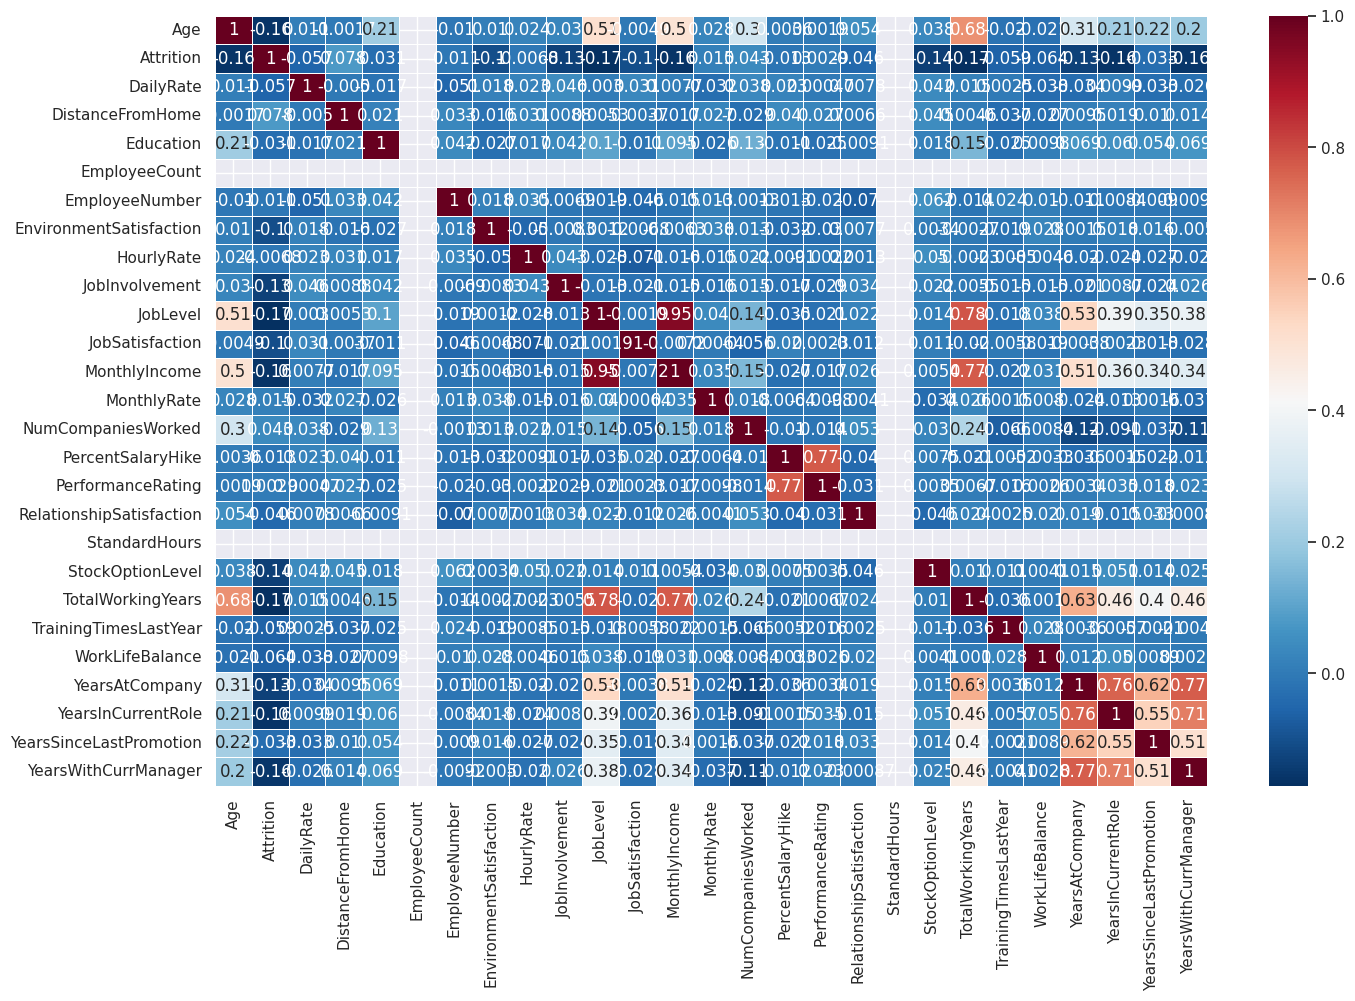

In [11]:
pearson = df.corr(method='pearson')
pearson
plt.figure(figsize=(16, 10))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Some variables that are more related to the target variable Attrition: EnvironmentSatisfaction, JobInvolvement, Job level, JobSatisfaction, MonthlyIncome, StockOptionalLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearswithManager.

Since the correlation analysis only includes numercial variables, the below graphs will explore the categorical variables.

<ipython-input-12-a3c41356e760>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0.5, 1.0, 'Number of Attritions Reported by Education Field')

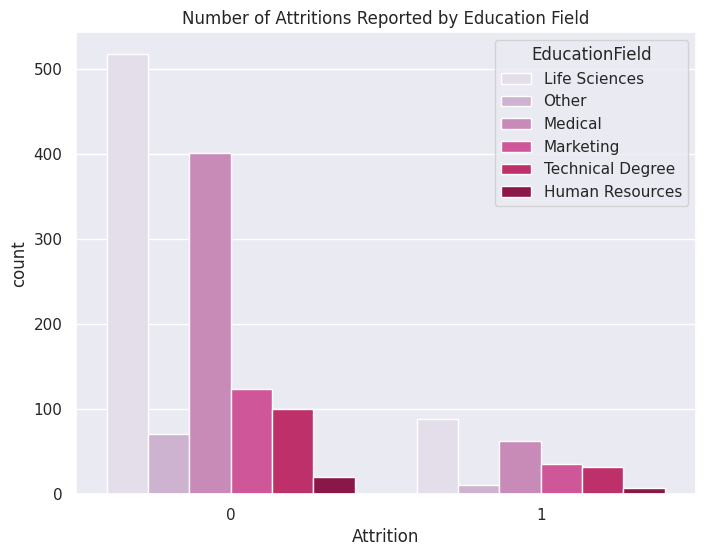

In [12]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='EducationField',data=df, palette = 'PuRd').set_title("Number of Attritions Reported by Education Field")

This plot shows the number of attritions reported by Education Field. It seems that although technical degree, marketing, and human resources fields make up a small proportion of the dataset, the proportions of the attrited employees are higher. Below we look at the percentage of attrited employees by education field.

In [13]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size() / df.groupby(["EducationField"]).size()


EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
dtype: float64

In [14]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size()


EducationField
Human Resources      7
Life Sciences       89
Marketing           35
Medical             63
Other               11
Technical Degree    32
dtype: int64

In [15]:
df[(df["Attrition"] == 0)].groupby(["EducationField"]).size()


EducationField
Human Resources      20
Life Sciences       517
Marketing           124
Medical             401
Other                71
Technical Degree    100
dtype: int64

This shows that human resources, technical degree, and marketing have a higher percentage of attrition.



<ipython-input-16-5567e09dc8c9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0.5, 1.0, 'Number of Attritions Reported by Over Time')

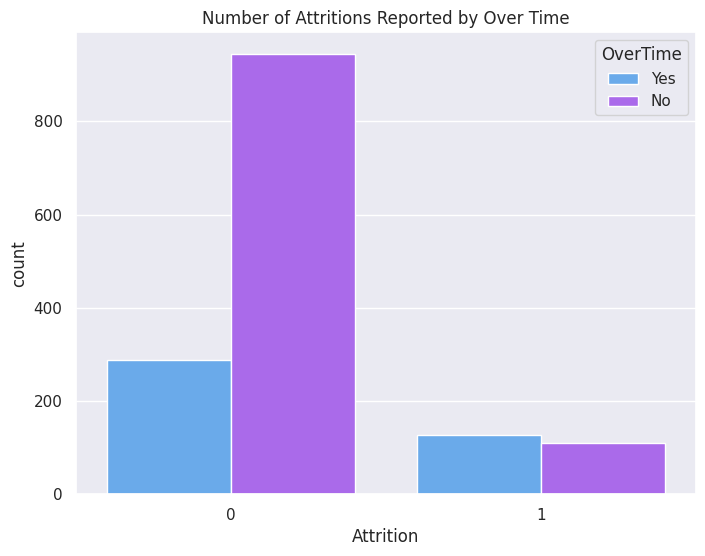

In [16]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='OverTime',data=df, palette = 'cool').set_title("Number of Attritions Reported by Over Time")

<ipython-input-17-96717555643c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0.5, 1.0, 'Number of Attritions Reported by Job Roles')

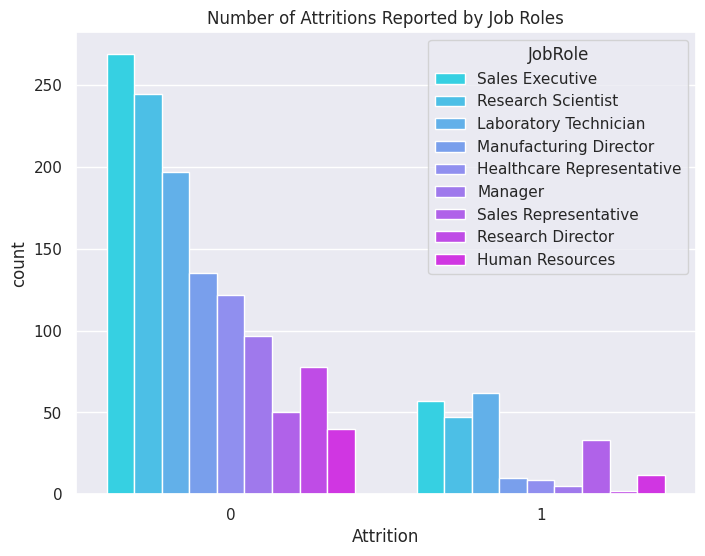

In [17]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='JobRole',data=df, palette = 'cool').set_title("Number of Attritions Reported by Job Roles")

In [18]:
df[(df["Attrition"] == 1)].groupby(["OverTime"]).size() / df.groupby(["OverTime"]).size()


OverTime
No     0.104364
Yes    0.305288
dtype: float64

About 30.5% of overtime employees have attrited, meaning that it is a factor that needs to be accounted for employee attrition.

<ipython-input-19-f77ddfdfdc83>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0.5, 1.0, 'Number of Attritions Reported by Amount of Business Travel')

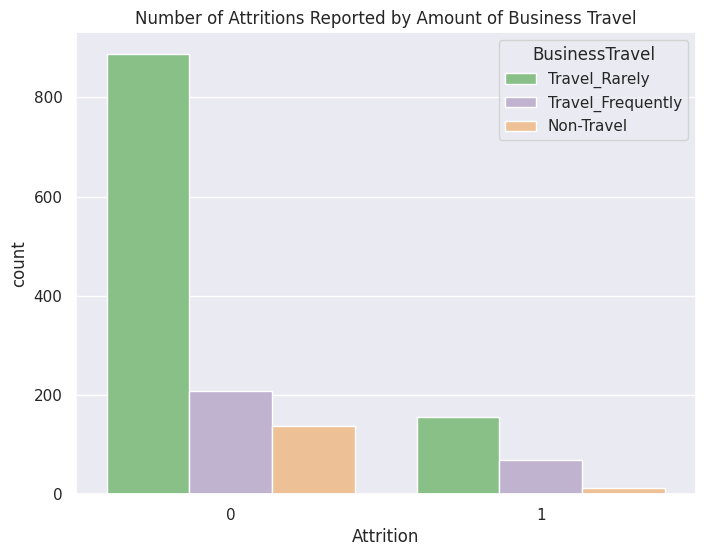

In [19]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='BusinessTravel',data=df, palette = 'Accent').set_title("Number of Attritions Reported by Amount of Business Travel")

In [20]:
df[(df["Attrition"] == 1)].groupby(["BusinessTravel"]).size() / df.groupby(["BusinessTravel"]).size()


BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
dtype: float64

The percentage of attrition among Travel_Frequently group is much higher than the other two groups.



<ipython-input-21-4cbda9bb3db2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0.5, 1.0, 'Number of Attritions Reported by Gender')

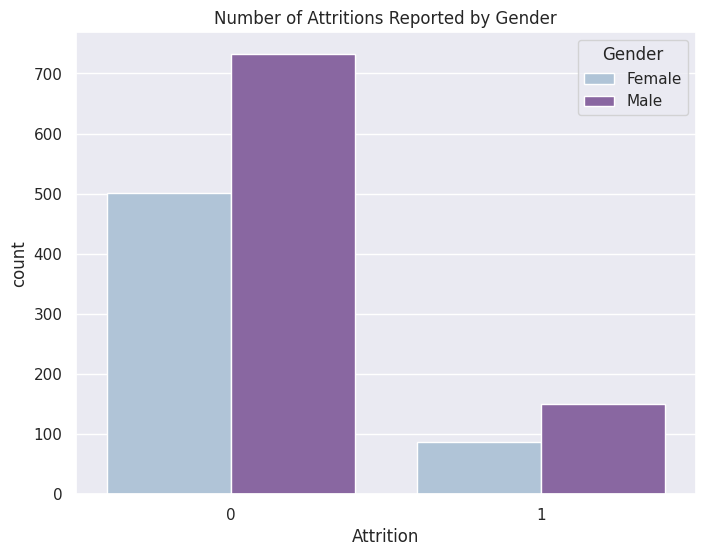

In [21]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='Gender',data=df, palette = 'BuPu').set_title("Number of Attritions Reported by Gender")

In [22]:
df[(df["Attrition"] == 1)].groupby(["Gender"]).size() / df.groupby(["Gender"]).size()


Gender
Female    0.147959
Male      0.170068
dtype: float64

This graph shows that about 250 employees departed the company, while about 1200 employees stayed. There is also a larger proportion of male in this dataset. The above statistics shows that 15% of female employees attrited and 17% of male employees attrited. However, considering that male employees make up a big portion of the sample, this difference is unlikely statistically significant.



<ipython-input-23-552a7b907247>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0.5, 1.0, 'Number of Attritions Reported by Marital Status')

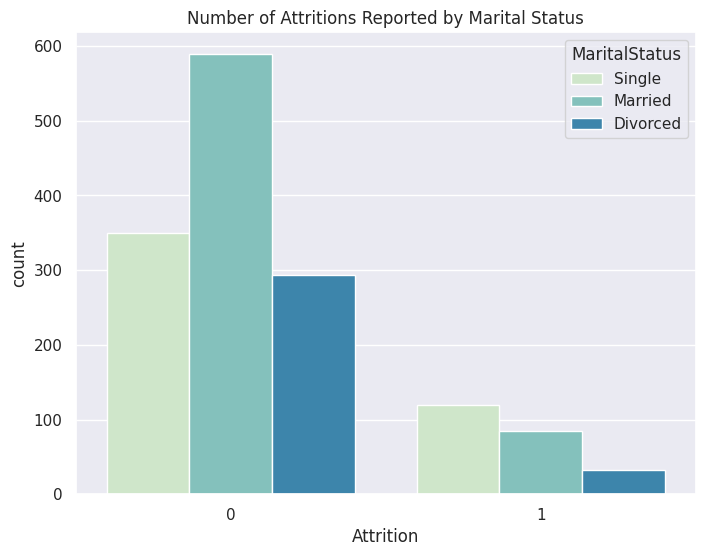

In [23]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='MaritalStatus',data=df, palette = 'GnBu').set_title("Number of Attritions Reported by Marital Status")

In [24]:
df[(df["Attrition"] == 1)].groupby(["MaritalStatus"]).size() / df.groupby(["MaritalStatus"]).size()


MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
dtype: float64

In [25]:
df[(df["Attrition"] == 1)].groupby(["JobRole"]).size() / df.groupby(["JobRole"]).size()


JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
dtype: float64

This statistics show the percentage of attrition by Job role, almost 40% of attrited employees are sales representatives, followed by laboratory technicians and human resources positions.



##Data Preparation and Modeling

####1. Data Preparation

In [26]:
df2 = df.copy()


In [27]:
lets_use_correlation = ['BusinessTravel', 'Department', 'EducationField',
                        'JobRole', 'MaritalStatus']

for i in lets_use_correlation:
  try:
    numericizer(df2, i, "blah")
  except: 
    print(i)
df2


BusinessTravel
Department
EducationField
JobRole
MaritalStatus


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [28]:
# Changing binary representation of Gender, Overtime variables to 1/0
df2.Gender = df.Gender.map({'Male':1, 'Female':0})
df2.OverTime = df.OverTime.map({'Yes':1, 'No':0})


<ipython-input-29-ada73e20c3c1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson = df2.corr(method='pearson')


<Axes: >

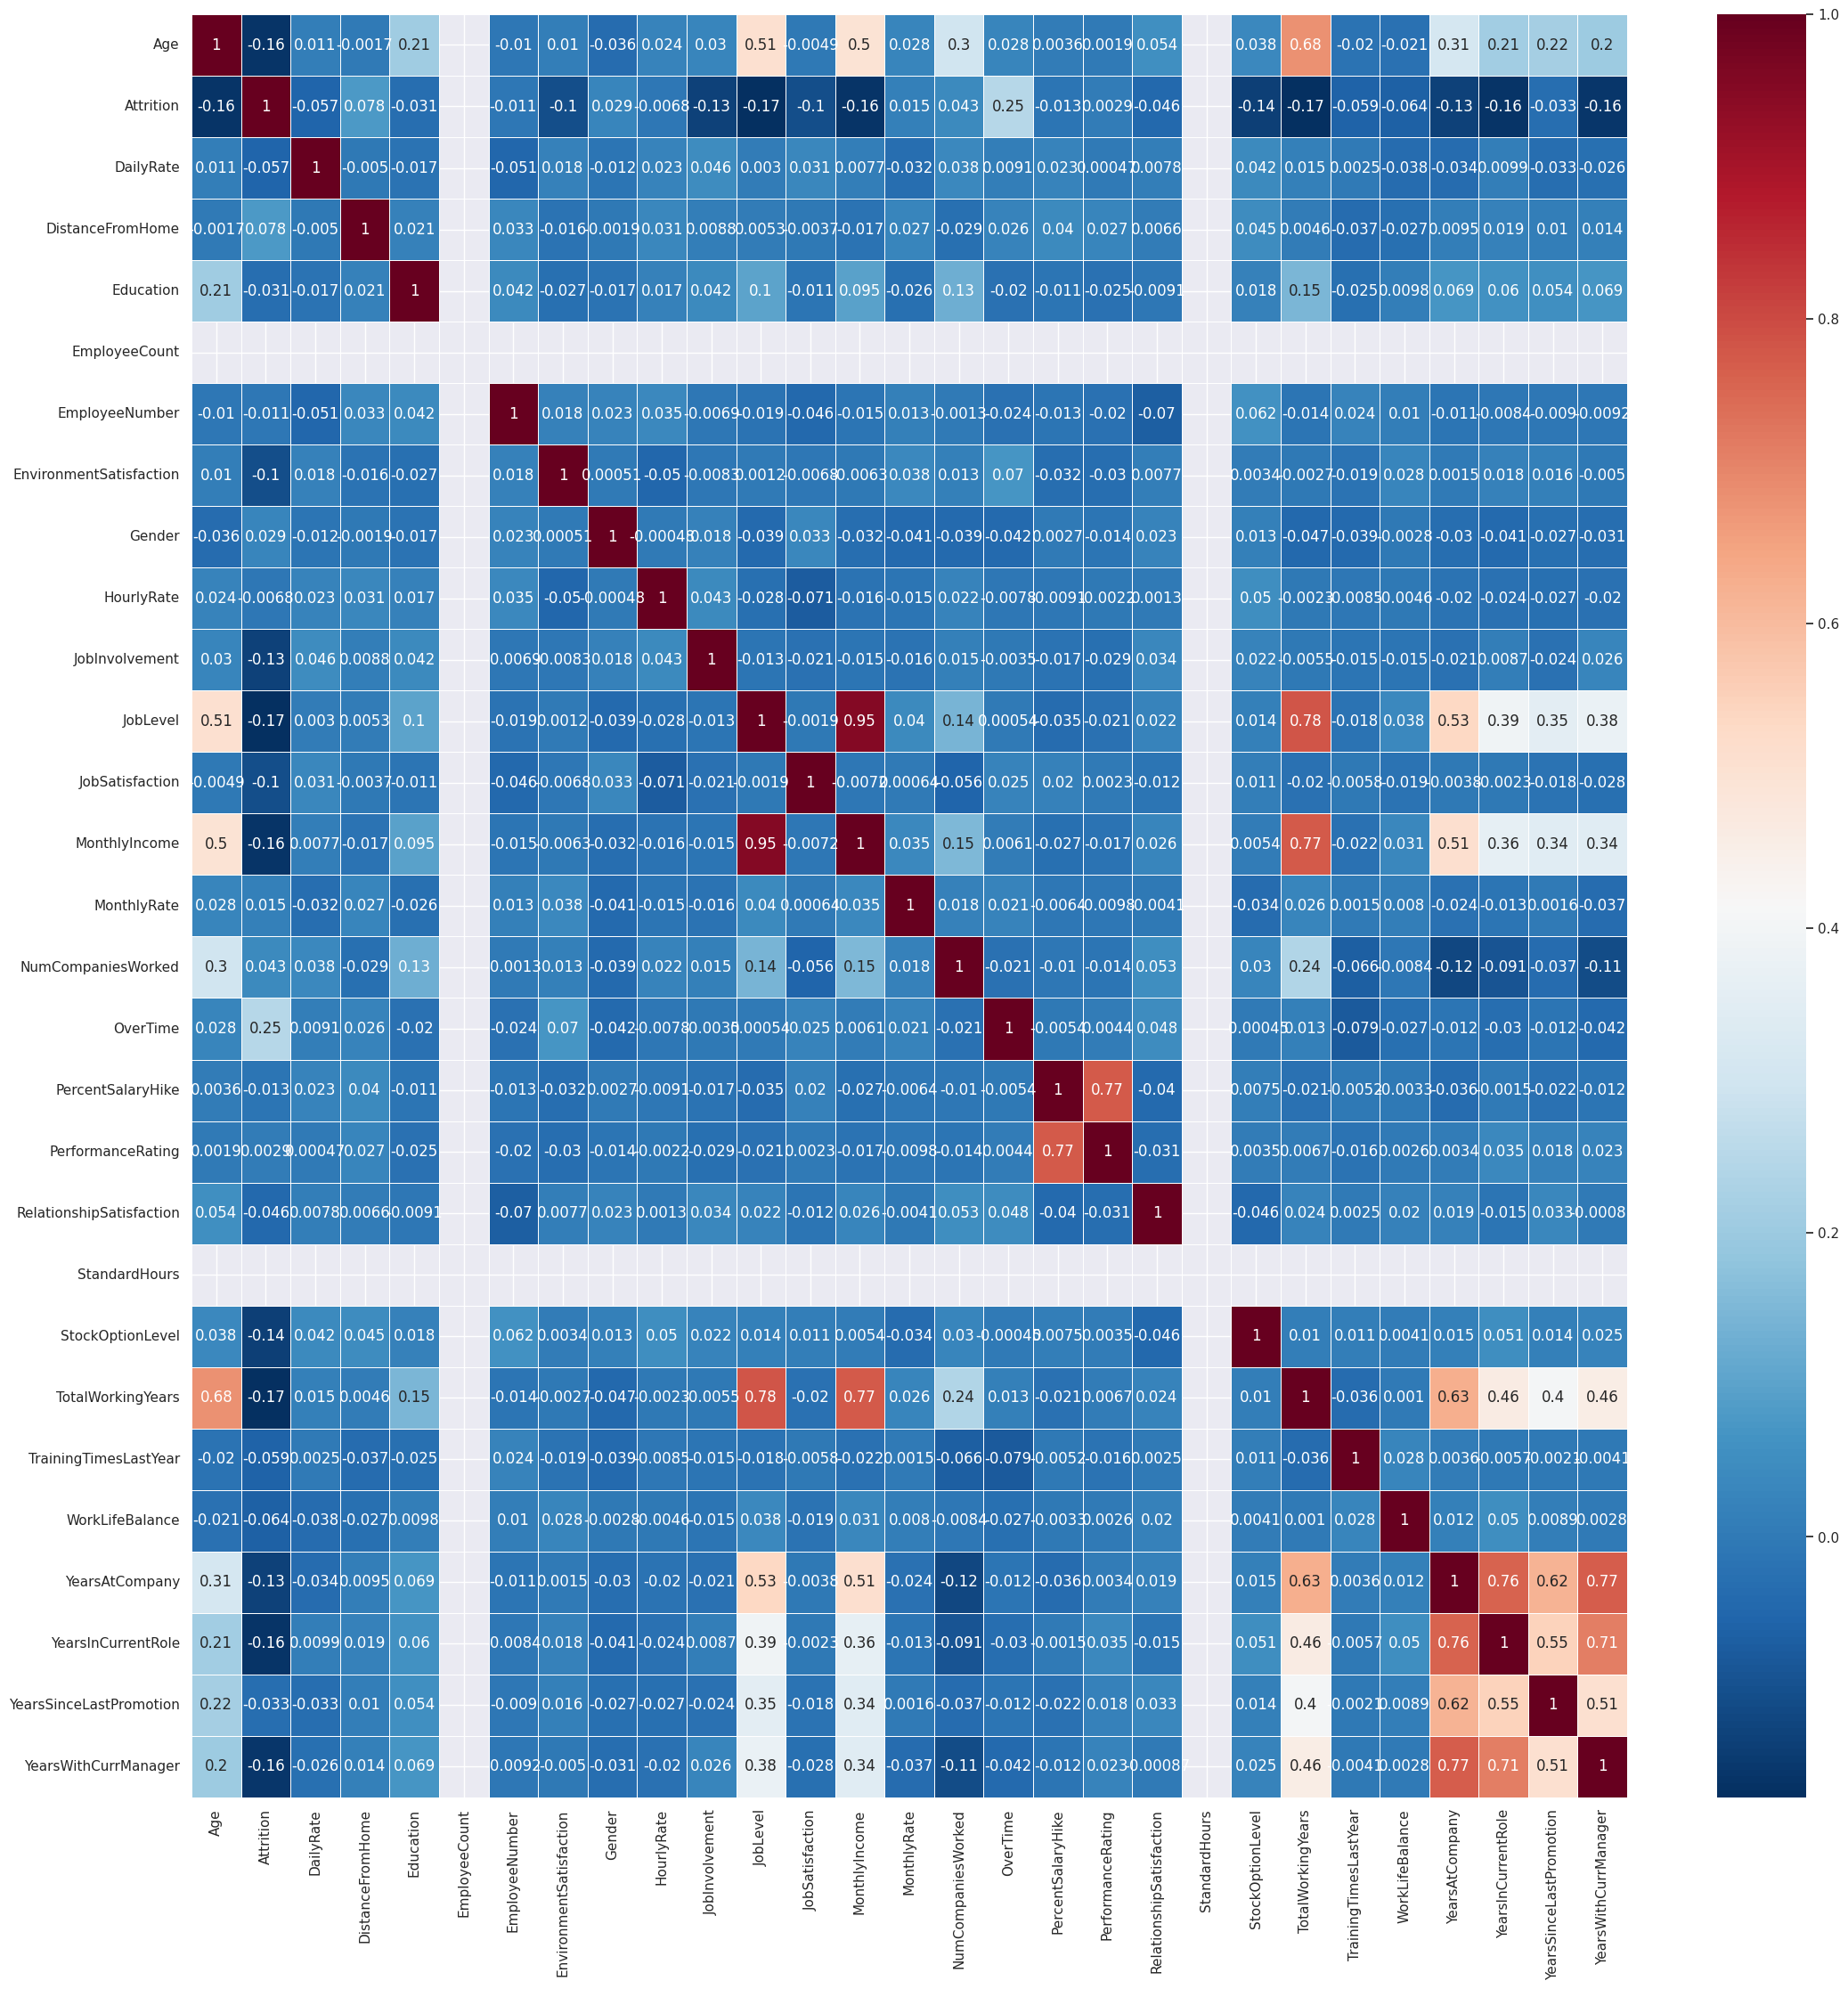

In [29]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = df2.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


It shows that the categorical variables that we transformed do show a relationship with the target variable. Especailly OverTime and JobRole.



####2. Feature Selection



In [30]:
# Picking the features that have absolute correlation value greater than 0.1 
df3 = df2[['Attrition', 'Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]
#

In [41]:
from sklearn.linear_model import LogisticRegression


In [37]:
LogisticRegression(max_iter=800, random_state=86, solver='newton-cg')


LogisticRegression(max_iter=800, random_state=86, solver='newton-cg')

In [39]:
LR = LogisticRegression

####3. Modeling



In [31]:
# Separating dataset into x & y, where y is the target variable
x = df3.drop('Attrition', axis = 1)
y = df3['Attrition']
# Train test split using industry standard 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1176, 16) (1176,)
Test set: (294, 16) (294,)


We picked the logistic regression model to classify our data because our target feature, Attrition, is a binary feature. We used the 'newton-cg' solver because we are predicting Attrition using multiple features at once.



In [46]:
from sklearn.linear_model import LinearRegression

X = x.apply(pd.to_numeric, errors='coerce')
Y = y.apply(pd.to_numeric, errors='coerce')

In [47]:
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

<ipython-input-47-6687b8414ae9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)


In [ ]:
# Building logisticregression model to fit training model
LR = LogisticRegression(C=1.0, solver='newton-cg', max_iter=800, random_state=86).fit(x_train,y_train)
LR

In [ ]:
# Using training model to predict
yhat_train = LR.predict(x_train)
yhat_test = LR.predict(x_test)

####4. Model Accuracy



In [33]:
# Create confusion matrix function
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
# Compute confusion matrix for training data
cnf_matrix = confusion_matrix(y_train, yhat_train, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'], normalize= False,  title='Training Confusion Matrix')

In [ ]:
# Scoring the training model
print (classification_report(y_train, yhat_train))

In [ ]:
# Compute confusion matrix for testing data
cnf_matrix = confusion_matrix(y_test, yhat_test, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'],normalize= False,  title='Test Confusion matrix')


In [ ]:
print (classification_report(y_test, yhat_test))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


####5. Logistic Regression Analysis



In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())


In [ ]:
# Reselect features that have a p-value less than 0.05
df4 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

In [ ]:

# Continue to Reselect features that have a p-value less than 0.05
df5 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [ ]:
# Separating dataset into x & y, where y is the target variable
x1 = df5.drop('Attrition', axis = 1)
y1 = df5['Attrition']


In [ ]:
# Separating dataset into x & y, where y is the target variable
x1 = df5.drop('Attrition', axis = 1)
y1 = df5['Attrition']
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

In [ ]:
# Continue to Reselect features that have a p-value less than 0.05
df6 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel']]


In [ ]:
# Separating dataset into x & y, where y is the target variable
x1 = df6.drop('Attrition', axis = 1)
y1 = df6['Attrition']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())



```
###Conclusion

At the start of this project, we identified the importance of talent retention for a company and collected a dataset on employee information and attrition. We then completed an exploratory data analysis, creating heatmaps to show correlations between variables, and visualizations to understand the demographics and features of attrited employees. Using logistic regression algorithms, we built a model that helps predict employee attrition with an accuracy of 86%. Then we concluded that there are some variables that are important factors in an employee's decision to attrit such as education fields, job roles, satisfaction, etc. We also developed implications for companies with actions to consider in order to prevent future loss of talent. Overall, this project was a great practice utilizing data science concepts and machine learning algorithms. The methods used in this project can be used to help a company predict employee attrition using their own data on their employees. The insights uncovered through classification algorithms can be used to develop action items that help prevent future loss of talent.

```

# **bold text**